In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os
import json

import tensorflow as tf
tf.config.run_functions_eagerly(True)

from datetime import datetime


!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
project_dir="/content/drive/MyDrive/comp598-II/project"

src_dir=os.path.join(project_dir,"src")
datadir=os.path.join(project_dir,"data/")
npy_dir=os.path.join(project_dir,"data/npy")
result_dir=os.path.join(project_dir,"notebooks/DANN-WISDM/experiments")

import sys
sys.path.append(src_dir)

import dann_v1 as dann

In [3]:
#@title Default title text
unseen_subj =  1610#@param {type:"integer"}


In [4]:
seen_subj = list(range(1600,1605))

In [5]:
save_dir=str(seen_subj[0])+"-"
for s in seen_subj[1:]:
  save_dir+=(str(s)[2:]+"-")

save_dir+=("to-{}".format(unseen_subj))
save_dir=os.path.join(result_dir,save_dir)

try:  
    os.mkdir(save_dir)  
except OSError as error:  
    print(error) 

[Errno 17] File exists: '/content/drive/MyDrive/comp598-II/project/notebooks/DANN-WISDM/experiments/1600-01-02-03-04-to-1610'


In [6]:
act_subset=['Walking',
            'Clapping',
            'Drinking from Cup',
            'Jogging',
            'Brushing Teeth',
            'Typing',
            'Writing',
            'Stairs']

seen_device, unseen_device = "watch", "watch"
seen_sensor, unseen_sensor = "accel", "accel"


with open(os.path.join(datadir,"act_to_int.json"),"r") as jpath:
  act_int_lookup=json.load(jpath)

int_act_lookup={act_int_lookup[key]:key for key in act_int_lookup}

(seen_x,seen_y),(unseen_x,unseen_y),num_class, remapping_dict = dann.load_subjects(npy_dir,
                                                                   seen_subj,
                                                                   seen_device,
                                                                   seen_sensor,
                                                                   unseen_subj,
                                                                   unseen_device,
                                                                   unseen_sensor,
                                                                   act_int_lookup,
                                                                   act_subset)

remapped_int_act_lookup={remapping_dict[key]:int_act_lookup[int(remapping_dict[key])] for key in remapping_dict}
print(remapped_int_act_lookup)

print(seen_x.shape,seen_y.shape)
print(unseen_x.shape,unseen_y.shape)

{0: 'Walking', 1: 'Jogging', 2: 'Stairs', 3: 'Sitting', 4: 'Standing', 5: 'Typing', 6: 'Brushing Teeth', 7: 'Eating Soup'}
(2840, 100, 3) (2840,)
(568, 100, 3) (568,)


(-0.5, 99.5, 2.5, -0.5)

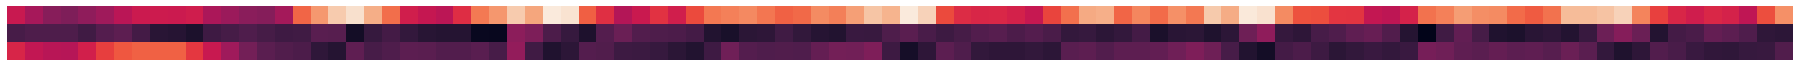

In [62]:
act=remapped_int_act_lookup[seen_y[2711]]
data=seen_x[0,:,:].T

plt.figure(figsize=(32,10))
plt.imshow(data)
plt.axis('off')



Text(0.5, 1.0, 'accelerometer data over 5 seconds: Brushing Teeth')

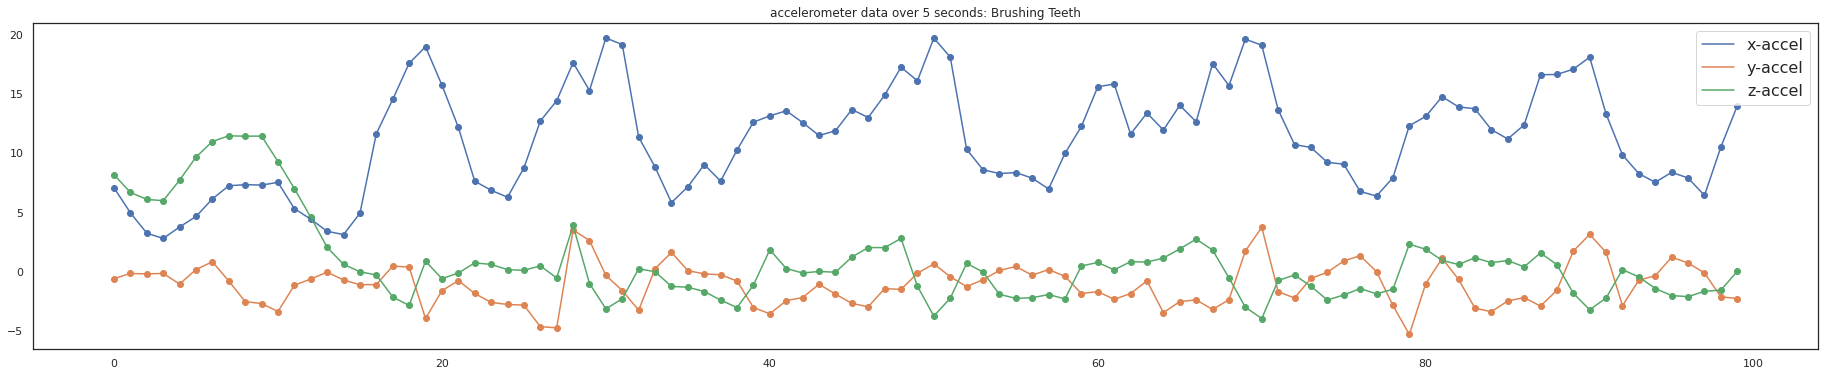

In [61]:
plt.figure(figsize=(32,6))
ind=np.arange(100)

plt.plot(data[0,:],label='x-accel')
plt.scatter(ind,data[0,:])

plt.plot(data[1,:],label='y-accel')
plt.scatter(ind,data[1,:])

plt.plot(data[2,:],label='z-accel')
plt.scatter(ind,data[2,:])

plt.legend(prop={'size':16})

plt.title("accelerometer data over 5 seconds: {}".format(act))